# Importing Libraries

In [1]:
# linear algebra

import numpy as np

# data processing
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Algorithms
import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

## Getting Data

In [2]:
cancer_data=load_breast_cancer()

In [3]:
cancer_data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
#Reading data
data1 = pd.DataFrame(data= np.c_[cancer_data['data'], cancer_data['target']],
                 columns= list(cancer_data['feature_names']) + ['target'])
data1.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


# Data Exploration and Analysis

In [5]:
data1.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

from above you may see complete each and every feature is a float

from here you maight be see that in count  569 rows is present and so there is no missing data

and also i had observe one thing 3rd column 75% and max values differenc is alot i think there is outliers present in this columns and also in 23 rd column outliers present in this column

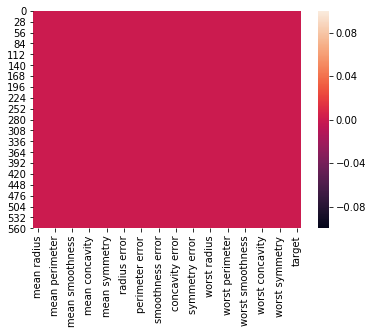

In [7]:
#checking missing values
sns.heatmap(data1.isnull())

there is no null data 

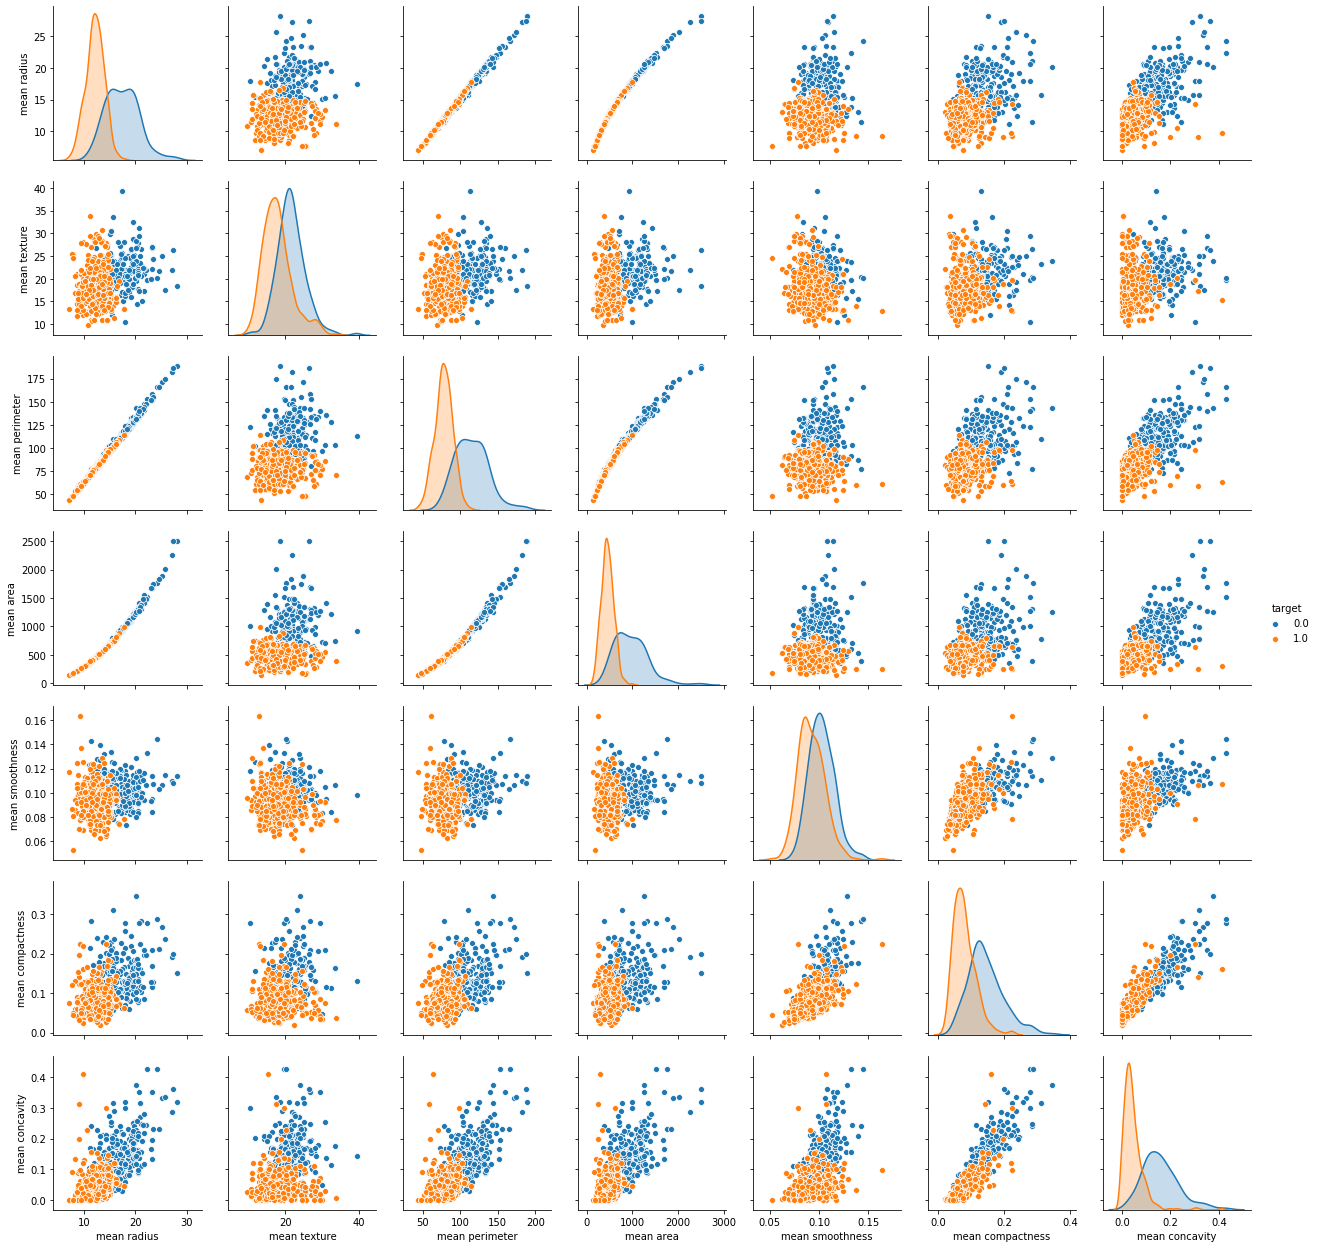

In [8]:
sns.pairplot(data1 ,hue ='target', vars =['mean radius','mean texture', 'mean perimeter', 'mean area',
 'mean smoothness', 'mean compactness' ,'mean concavity'])

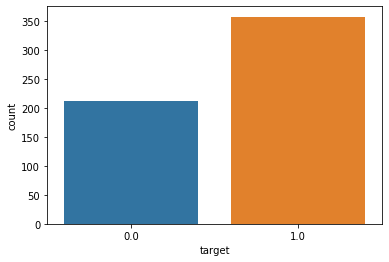

In [9]:
sns.countplot(data1['target'])

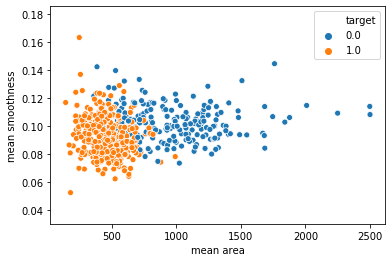

In [10]:
sns.scatterplot(x='mean area',y='mean smoothness',hue='target',data =data1)


In [11]:
data1.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


## plotting Outliers

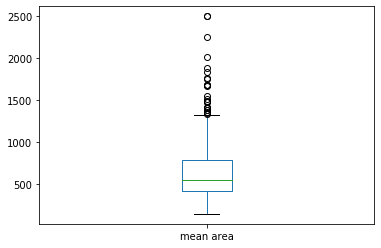

In [12]:
data1['mean area'].plot.box()

from here you may see that alot of outliers present in this column

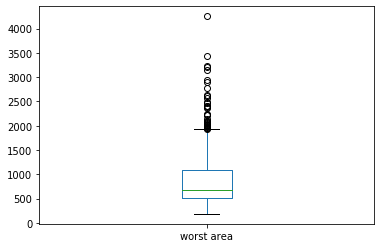

In [13]:
data1['worst area'].plot.box()

from here also you may see that there is alot of missing data present in this column

## To Check Distribution of Skewness

In [14]:
from scipy.stats import zscore
z=np.abs(zscore(data1))
z

array([[1.09706398, 2.07333501, 1.26993369, ..., 2.75062224, 1.93701461,
        1.29767572],
       [1.82982061, 0.35363241, 1.68595471, ..., 0.24388967, 0.28118999,
        1.29767572],
       [1.57988811, 0.45618695, 1.56650313, ..., 1.152255  , 0.20139121,
        1.29767572],
       ...,
       [0.70228425, 2.0455738 , 0.67267578, ..., 1.10454895, 0.31840916,
        1.29767572],
       [1.83834103, 2.33645719, 1.98252415, ..., 1.91908301, 2.21963528,
        1.29767572],
       [1.80840125, 1.22179204, 1.81438851, ..., 0.04813821, 0.75120669,
        0.77060855]])

In [15]:
threshold=3
np.where(z>3)

(array([  0,   3,   3,   3,   3,   3,   3,   3,   3,   9,   9,   9,  12,
         12,  12,  12,  12,  14,  14,  23,  25,  31,  31,  35,  42,  42,
         42,  60,  68,  68,  68,  68,  71,  71,  71,  71,  72,  78,  78,
         78,  78,  78,  82,  82,  82,  82,  82,  82,  82,  83, 105, 105,
        108, 108, 108, 108, 108, 108, 112, 112, 116, 119, 119, 122, 122,
        122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122,
        138, 138, 146, 146, 146, 151, 151, 152, 152, 152, 152, 152, 152,
        176, 176, 180, 180, 180, 180, 180, 180, 180, 181, 181, 190, 190,
        190, 190, 190, 192, 202, 203, 212, 212, 212, 212, 212, 212, 212,
        213, 213, 213, 213, 213, 219, 219, 232, 236, 236, 239, 239, 258,
        258, 258, 259, 259, 265, 265, 265, 265, 265, 288, 288, 290, 290,
        314, 314, 318, 323, 339, 339, 345, 351, 352, 352, 352, 352, 352,
        352, 352, 352, 368, 368, 370, 376, 376, 376, 379, 379, 379, 388,
        389, 400, 416, 417, 417, 430, 461, 461, 461

In [16]:
z[13][5]

0.07847777648013507

In [17]:
z[13][6]

0.1328401841539294

In [18]:
cancer_data_new=data1[(z<3).all(axis=1)]

In [19]:
cancer_data_new

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0.0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,...,33.17,100.2,706.7,0.1241,0.2264,0.1326,0.1048,0.2250,0.08321,1.0
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,29.41,179.1,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873,0.0
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.1,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.0,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637,0.0


In [20]:
cancer_data_new.shape

(495, 31)

In [21]:
data1.shape

(569, 31)

74 rows are deleted as a outliers

# Building Machine Learning Models

In [22]:
x=cancer_data_new.iloc[:,0:-1]

In [23]:
x

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,...,15.30,33.17,100.2,706.7,0.1241,0.2264,0.1326,0.1048,0.2250,0.08321
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,24.29,29.41,179.1,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.45,26.40,166.1,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.69,38.25,155.0,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637


In [24]:
y=cancer_data_new.iloc[:,-1]
y

1      0.0
2      0.0
4      0.0
5      0.0
6      0.0
      ... 
560    1.0
563    0.0
564    0.0
565    0.0
566    0.0
Name: target, Length: 495, dtype: float64

In [25]:
x.shape

(495, 30)

In [26]:
y.shape


(495,)

In [27]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=10)

In [28]:
train_x.shape

(396, 30)

In [29]:
test_x.shape

(99, 30)

In [30]:
train_y.shape

(396,)

In [31]:
test_y.shape

(99,)


## Logistic Regression

In [32]:
lg=LogisticRegression()
lg.fit(train_x,train_y)
pred=lg.predict(test_x)
print("accuracy_score:",accuracy_score(test_y,pred))

accuracy_score: 0.9696969696969697


In [33]:
confusion_matrix(test_y,pred)

array([[31,  3],
       [ 0, 65]], dtype=int64)

In [34]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

         0.0       1.00      0.91      0.95        34
         1.0       0.96      1.00      0.98        65

    accuracy                           0.97        99
   macro avg       0.98      0.96      0.97        99
weighted avg       0.97      0.97      0.97        99



# Gaussian Naive Bayes:

In [35]:
from sklearn.naive_bayes import GaussianNB

In [36]:
gnb=GaussianNB()
gnb.fit(train_x,train_y)
predgnb=gnb.predict(test_x)
accuracy_score(predgnb,test_y)

0.9595959595959596

In [37]:
confusion_matrix(test_y,predgnb)

array([[31,  3],
       [ 1, 64]], dtype=int64)

In [38]:
print(classification_report(test_y,predgnb))

              precision    recall  f1-score   support

         0.0       0.97      0.91      0.94        34
         1.0       0.96      0.98      0.97        65

    accuracy                           0.96        99
   macro avg       0.96      0.95      0.95        99
weighted avg       0.96      0.96      0.96        99



# Linear Support Vector Machine:

In [39]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf')
svc.fit(train_x,train_y)
predsvc=svc.predict(test_x)
print('actual and predicted value score',accuracy_score(test_y,predsvc))

actual and predicted value score 0.6565656565656566


In [40]:
print(confusion_matrix(test_y,predsvc))
accuracy_score(test_y,predsvc)

[[ 0 34]
 [ 0 65]]


0.6565656565656566

In [41]:
print(classification_report(test_y,predsvc))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        34
         1.0       0.66      1.00      0.79        65

    accuracy                           0.66        99
   macro avg       0.33      0.50      0.40        99
weighted avg       0.43      0.66      0.52        99



# K Nearest Neighbor:

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(train_x,train_y)
predknn=knn.predict(test_x)
accuracy_score(test_y,predknn)

0.9595959595959596

In [44]:
predknn

array([1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1.,
       1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0.])

# Decision Tree:

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
dct=DecisionTreeClassifier()
dct.fit(train_x,train_y)
preddct=dct.predict(test_x)
preddct

array([1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0.,
       1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
       0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0.])

In [47]:
accuracy_score(test_y,preddct)

0.9292929292929293

In [48]:
print(confusion_matrix(test_y,preddct))

[[32  2]
 [ 5 60]]


In [49]:
print(classification_report(test_y,preddct))

              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90        34
         1.0       0.97      0.92      0.94        65

    accuracy                           0.93        99
   macro avg       0.92      0.93      0.92        99
weighted avg       0.93      0.93      0.93        99



After observing all above algorithms best accuracy model's are Logistic Regression and Gaussian Naive Bayes

## K-Folds Cross Validation

In [50]:
from sklearn.model_selection import cross_val_score
lg = LogisticRegression()
scores = cross_val_score(lg, train_x, train_y, cv=5, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.9625     0.9625     0.92405063 0.92405063 0.93589744]
Mean: 0.9417997403440441
Standard Deviation: 0.017446491491071


In [51]:
dct = DecisionTreeClassifier()
scores = cross_val_score(dct, train_x, train_y, cv=9, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.91111111 0.84444444 0.93333333 0.97727273 0.97727273 0.95454545
 0.93023256 0.93023256 0.88372093]
Mean: 0.9269073160546029
Standard Deviation: 0.040572751346843565


## Hyperparameter Tuning

In [52]:
param_grid ={'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001],'kernel':['rbf']}
from sklearn.model_selection import GridSearchCV, cross_val_score
lg = LogisticRegression( random_state=1, n_jobs=-1)
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=4)
grid.fit(train_x, train_y)
grid.best_params_


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.674, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.674, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.674, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.674, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.674, total=   0.0s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.674, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.674, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.674, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.674, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.674, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.674, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.674, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    1.4s finished


{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [53]:
lg.get_params().keys()


dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [54]:
grid.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [55]:
grid_predictions=grid.predict(test_x)
grid_predictions

array([1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1.,
       1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0.])

In [56]:
cn=confusion_matrix(test_y,grid_predictions)
cn

array([[30,  4],
       [ 3, 62]], dtype=int64)

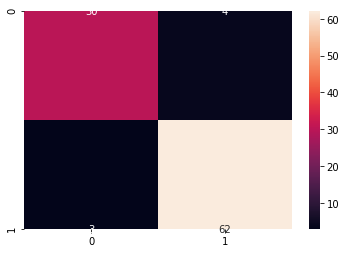

In [57]:
sns.heatmap(cn,annot=True)

# ROC AUC Curve

In [58]:
#Decission tree curve

In [59]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [60]:
dct.fit(train_x,train_y)
y_pred_prob_dct=dct.predict(test_x)

In [61]:
y_pred_prob_dct

array([1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0.,
       1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0.])

In [62]:
fpr,tpr,thresholds=roc_curve(test_y,y_pred_prob_dct)

In [63]:
fpr

array([0.        , 0.08823529, 1.        ])

In [64]:
tpr

array([0.        , 0.95384615, 1.        ])

In [65]:
thresholds

array([2., 1., 0.])

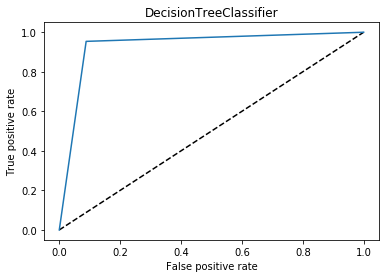

In [66]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='DecisionTreeClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('DecisionTreeClassifier')
plt.show()

In [67]:
auc_score=roc_auc_score(test_y,y_pred_prob_dct)
auc_score

0.9328054298642534

In [68]:
#Logistic Regression  curve

In [69]:
lg.fit(train_x,train_y)
y_pred_prob_lg=lg.predict(test_x)

In [70]:
fpr,tpr,thresholds=roc_curve(test_y,y_pred_prob_lg)

In [71]:
fpr

array([0.        , 0.08823529, 1.        ])

In [72]:
tpr

array([0., 1., 1.])

In [73]:
thresholds

array([2., 1., 0.])

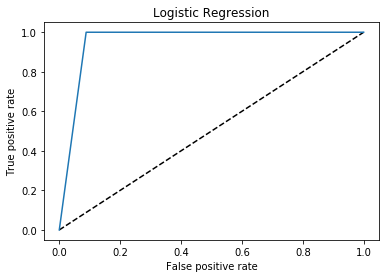

In [74]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()

In [75]:
auc_score=roc_auc_score(test_y,y_pred_prob_lg)

In [76]:
auc_score

0.9558823529411764

# Saving model 

In [77]:
from sklearn.externals import joblib
#save the model as a pickle in a file
joblib.dump(lg,'lg.obj')
#load the model from a file
lg_from_joblib=joblib.load('lg.obj')
#use the loaded model to make prediction
lg_from_joblib.predict(test_x)

array([1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1.,
       1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0.])